# NBA Prediction Model
### Presented by: Bladimir Nunez
### Last Updated: May 8, 2024


## Project Overview
I will be webscraping 10 seasons worth of NBA game data for the Boston Celtics to be able to create a prediction model to predict the points scored by the celtics in a game using the historical game data.

## Import Libaries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

In [3]:
# Gather the 10 season stats of celtics games urls
celts_stats_2013 = 'https://www.basketball-reference.com/teams/BOS/2014/gamelog/'
celts_stats_2014 = 'https://www.basketball-reference.com/teams/BOS/2015/gamelog/'
celts_stats_2015 = 'https://www.basketball-reference.com/teams/BOS/2016/gamelog/'
celts_stats_2016 = 'https://www.basketball-reference.com/teams/BOS/2017/gamelog/'
celts_stats_2017 = 'https://www.basketball-reference.com/teams/BOS/2018/gamelog/'
celts_stats_2018 = 'https://www.basketball-reference.com/teams/BOS/2019/gamelog/'
celts_stats_2019 = 'https://www.basketball-reference.com/teams/BOS/2020/gamelog/'
celts_stats_2020 = 'https://www.basketball-reference.com/teams/BOS/2021/gamelog/'
celts_stats_2021 = 'https://www.basketball-reference.com/teams/BOS/2022/gamelog/'
celts_stats_2022 = 'https://www.basketball-reference.com/teams/BOS/2023/gamelog/'

In [4]:
# Access tables
games_2013 = pd.read_html(celts_stats_2013, header=1)[0]
games_2014 = pd.read_html(celts_stats_2014, header=1)[0]
games_2015 = pd.read_html(celts_stats_2015, header=1)[0]
games_2016 = pd.read_html(celts_stats_2016, header=1)[0]
games_2017 = pd.read_html(celts_stats_2017, header=1)[0]
games_2018 = pd.read_html(celts_stats_2018, header=1)[0]
games_2019 = pd.read_html(celts_stats_2019, header=1)[0]
games_2020 = pd.read_html(celts_stats_2020, header=1)[0]
games_2021 = pd.read_html(celts_stats_2021, header=1)[0]
games_2022 = pd.read_html(celts_stats_2022, header=1)[0]

# drop opponent data from tables
games_2013.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2014.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2015.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2016.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2017.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2018.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2019.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2020.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2021.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
games_2022.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)

In [5]:
# combine all tables into one
tables = [games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020,games_2021,games_2022]
celts_hist_game_data = pd.concat(tables)
celts_hist_game_data.drop([86,87,64,65,42,43,20,21],axis=0, inplace=True)
celts_hist_game_data.drop(['Unnamed: 24','FG.1','FGA.1','FG%.1','3P.1','3PA.1','3P%.1','FT.1','FTA.1','FT%.1','ORB.1','TRB.1','AST.1','STL.1','BLK.1','TOV.1','PF.1'], axis=1, inplace=True)
celts_hist_game_data

KeyError: "['Unnamed: 24', 'FG.1', 'FGA.1', 'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'] not found in axis"

## Data Cleaning

In [ ]:
# change column name for home/away and replace null values with 'home' to indicate home games
celts_hist_game_data.rename(columns={celts_hist_game_data.columns[3]: 'Home/Away'}, inplace=True)

# In home/away column replace null vales with 'home'
celts_hist_game_data['Home/Away'].fillna('Home',inplace=True)
celts_hist_game_data['Home/Away'] = celts_hist_game_data['Home/Away'].replace('@', 'Away')


In [6]:
# convert columns to numeric data types
celts_hist_game_data['Tm'] = celts_hist_game_data['Tm'].astype(int)
celts_hist_game_data['Opp.1'] = celts_hist_game_data['Opp.1'].astype(int)
celts_hist_game_data['FG'] = celts_hist_game_data['FG'].astype(int)
celts_hist_game_data['FGA'] = celts_hist_game_data['FGA'].astype(int)
celts_hist_game_data['3P'] = celts_hist_game_data['3P'].astype(int)
celts_hist_game_data['3PA'] = celts_hist_game_data['3PA'].astype(int)
celts_hist_game_data['FT'] = celts_hist_game_data['FT'].astype(int)
celts_hist_game_data['FTA'] = celts_hist_game_data['FTA'].astype(int)
celts_hist_game_data['ORB'] = celts_hist_game_data['ORB'].astype(int)
celts_hist_game_data['TRB'] = celts_hist_game_data['TRB'].astype(int)
celts_hist_game_data['AST'] = celts_hist_game_data['AST'].astype(int)
celts_hist_game_data['STL'] = celts_hist_game_data['STL'].astype(int)
celts_hist_game_data['BLK'] = celts_hist_game_data['BLK'].astype(int)
celts_hist_game_data['TOV'] = celts_hist_game_data['TOV'].astype(int)
celts_hist_game_data['PF'] = celts_hist_game_data['PF'].astype(int)
celts_hist_game_data['3P%'] = celts_hist_game_data['3P%'].astype(float)
celts_hist_game_data['FT%'] = celts_hist_game_data['FT%'].astype(float)
celts_hist_game_data['FG%'] = celts_hist_game_data['FG%'].astype(float)
celts_hist_game_data['year'] = pd.DatetimeIndex(celts_hist_game_data['Date']).year

## Exploratory Data Analysis

In [7]:
celts_hist_game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 89
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          800 non-null    object 
 1   G           800 non-null    object 
 2   Date        800 non-null    object 
 3   Unnamed: 3  400 non-null    object 
 4   Opp         800 non-null    object 
 5   W/L         800 non-null    object 
 6   Tm          800 non-null    int64  
 7   Opp.1       800 non-null    int64  
 8   FG          800 non-null    int64  
 9   FGA         800 non-null    int64  
 10  FG%         800 non-null    float64
 11  3P          800 non-null    int64  
 12  3PA         800 non-null    int64  
 13  3P%         800 non-null    float64
 14  FT          800 non-null    int64  
 15  FTA         800 non-null    int64  
 16  FT%         800 non-null    float64
 17  ORB         800 non-null    int64  
 18  TRB         800 non-null    int64  
 19  AST         800 non-null    int64  

In [8]:
celts_hist_game_data.describe()

,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,year
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.00000,800.00000,800.000000,800.00000,800.00000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,108.252500,105.158750,39.902500,87.602500,0.456420,11.49000,31.995000,0.355710,16.95750,21.44625,0.792694,10.43375,44.37625,24.185000,7.750000,4.78750,13.182500,20.422500,2018.062500
std,12.835485,11.896132,5.136972,7.079346,0.054259,4.37365,8.645572,0.085517,5.70911,6.89413,0.094070,3.71421,6.20708,5.142113,2.884944,2.46169,3.612549,4.298499,2.936728
min,75.000000,73.000000,25.000000,66.000000,0.298000,1.00000,10.000000,0.040000,3.00000,4.00000,0.412000,2.00000,28.00000,10.000000,1.000000,0.00000,3.000000,9.000000,2013.000000
25%,99.000000,96.000000,36.000000,83.000000,0.418000,8.00000,26.000000,0.300000,13.00000,17.00000,0.733000,8.00000,40.00000,21.000000,6.000000,3.00000,11.000000,18.000000,2016.000000
50%,108.000000,105.000000,40.000000,87.000000,0.453000,11.00000,32.000000,0.353000,17.00000,21.00000,0.800000,10.00000,44.00000,24.000000,8.000000,5.00000,13.000000,20.000000,2018.000000
75%,116.000000,113.000000,43.000000,92.000000,0.489000,14.00000,38.000000,0.412000,21.00000,26.00000,0.857000,13.00000,48.25000,28.000000,10.000000,6.00000,16.000000,23.000000,2021.000000
max,149.000000,150.000000,56.000000,117.000000,0.621000,27.00000,59.000000,0.615000,34.00000,43.00000,1.000000,25.00000,67.00000,40.000000,20.000000,16.00000,27.000000,35.000000,2023.000000


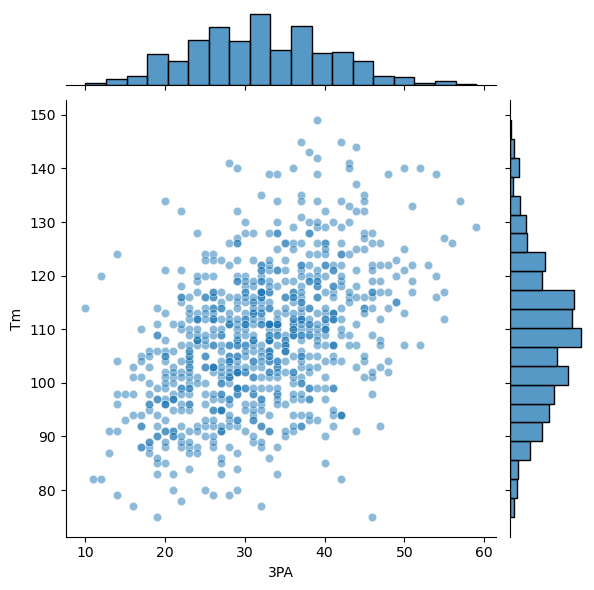

In [10]:
# compare 3 point attempts to total points per game 
sns.jointplot(x='3PA', y='Tm', data=celts_hist_game_data, alpha=0.5)


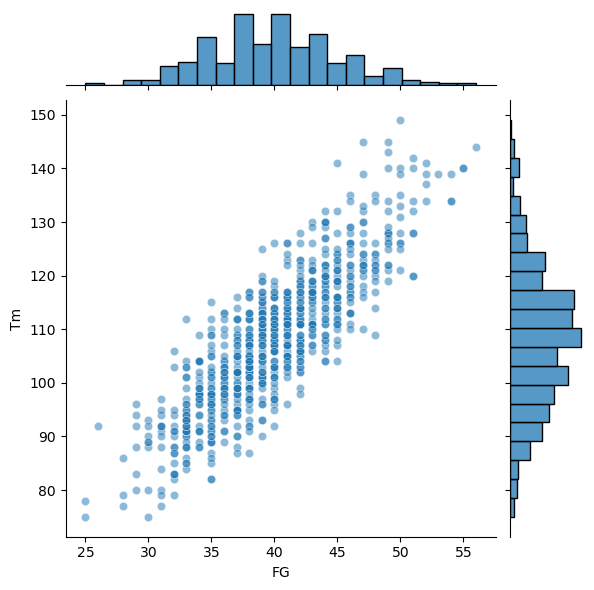

In [17]:
# compare team points and FG correlation
sns.jointplot(x='FG', y='Tm', data=celts_hist_game_data, alpha=0.5)

## Data Modeling 

In [47]:
x = celts_hist_game_data[['FG', 'FG%', '3P', '3P%','FT', 'FT%','AST','Opp.1']]
y = celts_hist_game_data['Tm']

# create dataset to split our predictive and target data
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
# Training model
lm = LinearRegression()


In [49]:
lm.fit(x_train,y_train)

LinearRegression()

In [50]:
lm.coef_

array([ 2.00000000e+00, -1.35308431e-14,  1.00000000e+00,  3.31111365e-16,
        1.00000000e+00, -7.78565299e-17, -1.32559928e-16,  4.07061538e-16])

In [51]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns = ['Coef'])
print(cdf)

               Coef
FG     2.000000e+00
FG%   -1.353084e-14
3P     1.000000e+00
3P%    3.311114e-16
FT     1.000000e+00
FT%   -7.785653e-17
AST   -1.325599e-16
Opp.1  4.070615e-16


In [52]:
#predictions
predictions = lm.predict(x_test)
predictions

array([129., 111.,  83., 139., 120.,  96.,  98., 108., 109., 107.,  80.,
       108.,  92.,  89., 112., 124., 100., 105., 109., 114., 130., 113.,
        99., 102., 112.,  91., 111.,  83., 122., 122., 104., 106., 141.,
       110.,  88.,  88., 108., 100., 101., 103.,  79., 122., 102.,  91.,
       112.,  94., 111., 118.,  96., 119., 107.,  88., 103., 109., 101.,
       102., 115.,  96.,  94., 118., 115., 112.,  88., 103., 109.,  94.,
       114., 104., 124., 101., 141., 102., 122.,  96.,  82.,  92., 102.,
        96., 107., 126., 114., 106., 102.,  97., 108., 114., 109., 112.,
        89., 105., 112., 117., 110., 117., 119., 122., 110., 111.,  94.,
       121., 116., 118., 109.,  93., 111., 119., 111., 106., 112., 108.,
        86., 109., 113.,  88., 126., 106.,  97., 142., 116.,  91., 110.,
       121.,  91., 111., 111., 105., 114., 103., 106., 109.,  90., 107.,
       102., 113., 103.,  92., 107.,  98.,  95., 110., 113., 119.,  96.,
       139., 120., 128.,  87., 114., 111., 109., 10

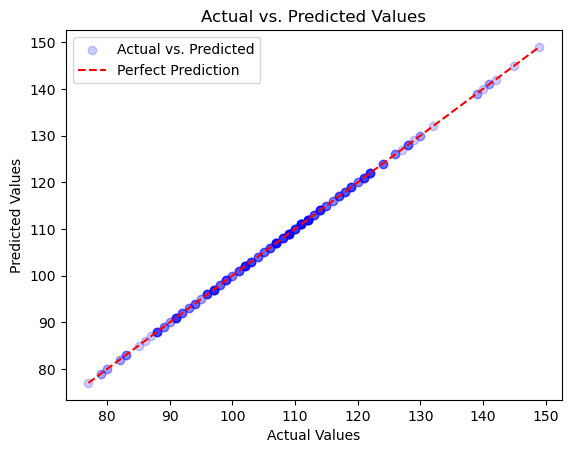

In [67]:
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted',alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [54]:
print('Mean Absolute Error: ' , mean_absolute_error(y_test,predictions))
print('Mean Square Error: ' , mean_squared_error(y_test,predictions))
print('R2 Score: ' , r2_score(y_test,predictions))

Mean Absolute Error:  1.3441100084795228e-14
Mean Square Error:  3.4920242737783457e-28
R2 Score:  1.0
